# Project: Investigate TMDb Movies Data from 1960 to 2015

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDb Movies dataset is a compilation of metadata for over 10,000 from 1960 to 2015, extracted from The Movie Database (https://www.themoviedb.org). In this project, the data is cleaned and explored to answer four key questions of interests.

1. Which genres have the most revenue from year to year?
2. Which genres are most popular from year to year?
3. What's the relationship between popularity and revenue?
4. What's the relationship between budget and revenue?


In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, the data is loaded, checked for cleanliness, and then trimmed and cleaned for the analysis.

### General Properties

Firstly, let's load the TMDb Movies data from the CSV file and print out a few lines to see how our data looks, before deciding what to do with it and how to go about our analysis. 

After loading the data we will perform some operations to inspect the data types and look for instances of missing or possibly errant data.

In [2]:
df_o = pd.read_csv('tmdb-movies.csv') # Named the dataframe as 'df_o', which stands for Original dataframe.
print('The shape of the original TMDb Movies Data is ',df_o.shape)
df_o.head(3)

The shape of the original TMDb Movies Data is  (10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


**Let's describe what each column of the TMBd movies data represents**
1. **id -** Unique idetifier of each recored in database
2. **imdb_id -** IMdb (Internet Movie Database) unique identifier
3. **popularity -** A metric used to measure the popularity of the movie. 
4. **budget -** The total budget of the moviein USD.
5. **revenue -** The total revenue of the movie in USD.
6. **original_title -** The original title of the movie.
7. **cast -** The names of the cast of the movie. Each cast is separated by "|". 
8. **homepage -** The website of the movie (if available).
9. **director -** Name(s) of the director(s) of the movie (separated by "|" if there are more than one director).
10. **tagline -** A catchphrase describing the movie.
11. **keywords -** Keywords related to the movie.
12. **overview -** Summary of the plot of the movie.
13. **runtime -** Total runtime of the movie in minutes.
14. **genres -** Genres of the movie separated by "|".
15. **production_companies -** Production compan(y/ies) of the movie.
16. **release_date -** Release date of the movie.
17. **vote_count -** Number of voters of te movie.
16. **vote_average -** The average user rating of the movie.
19. **release_year -** release year of the movie (from 1960 to 2015).
20. **budget_adj -** The total budget of the moviein USD in terms of 2010 dollars, accounting for inflation over time.
21. **revenue_adj -** The total budget of the movie in USD in terms of 2010 dollars, accounting for inflation over time.

In [3]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>The info of the dataframe is reviewed to provide more insight into the data structure. This provides an overview of the number of columns and rows, the datatypes and which columns have missing data.

>Nine columns have missing entries (imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies). Some of the data columns will not be needed for analysis and hence, will be dropped.

### Data Cleaning Exercise

Drop all duplicate values within the dataframe so that we have unique data to work with.

In [4]:
df_o.drop_duplicates(inplace=True)
print('The new shape of the TMDb Movies Data after dropping the duplicate values is ',df_o.shape)

The new shape of the TMDb Movies Data after dropping the duplicate values is  (10865, 21)


In [5]:
df_o.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>The data appears to have duplicate percentile properties between **min** and **50%** for the following columns. A work arround this will help us the evenly place movies in categories for analysis.
>1. budget
>2. revenue
>3. budget_adj
>4. revenue_adj

**Creating few extra columns to define data required to answer the analysis questions**

>1. The genre string data is split using the "|" separator so that each movie's genre is in a separate data column labeled primary_genre_main, genre_2, genre_3, genre_4, and genre_5.
>2. For each genre in data columns created, it is converted to integer in a corresponding integer datatype column and filled with **1** (for non-null) and **0** (for null value).
>3. A count of genres for each movie is then calcuated and placed in a **genre_count** data column.
>4. Create a function for dividing categorizing movies popularity, budget and revenue into four using the percentile data.
>4. The only new columns we keep are the **primary_genre** and **genre_count** columns and the rest are droped from the dataframe.

In [6]:
#Split genres data columns into separate string column for each genre
#The genre string data is split using the "|" separator so that each movie's genre is in a separate 
#data column labeled primary_genre, genre_2, genre_3, genre_4 and genre

df_o['primary_genre']= df_o.genres.str.split('|', expand=True)[0]
df_o['genre_2']= df_o.genres.str.split('|', expand=True)[1]
df_o['genre_3']= df_o.genres.str.split('|', expand=True)[2]
df_o['genre_4']= df_o.genres.str.split('|', expand=True)[3]
df_o['genre_5']= df_o.genres.str.split('|', expand=True)[4]

#Create interger column for each genre column
df_o['gmain'] = df_o['primary_genre'].apply(lambda x: 0 if x == None else 1)
df_o['g2'] = df_o['genre_2'].apply(lambda x: 0 if x == None else 1)
df_o['g3'] = df_o['genre_3'].apply(lambda x: 0 if x == None else 1)
df_o['g4'] = df_o['genre_4'].apply(lambda x: 0 if x == None else 1)
df_o['g5'] = df_o['genre_5'].apply(lambda x: 0 if x == None else 1)

#count the number of genres per movie
df_o['genre_count']= df_o['gmain'] + df_o['g2'] + df_o['g3'] + df_o['g4'] + df_o['g5']

Create a function for categorizing movies into four using the percentile data.

In [7]:
def category_points(df,column_label,point_names):
    bin_edges=[
        df[column_label].describe()['min'],
        df[column_label].describe()['25%'],
        df[column_label].describe()['50%'],
        df[column_label].describe()['75%'],
        df[column_label].describe()['max']
    ]
    cat_col_label=column_label+"_level"
    df[cat_col_label]=pd.cut(df[column_label], bin_edges, labels=point_names)
    return df

The below code puts movies into four popularity categories based on percentile break point function

In [8]:
point_names=['Not Popular', 'Somewhat Popular', 'Popular', 'Very Popular']
df_o=category_points(df_o,'popularity',point_names)

In [9]:
#Drop all unneeded columns from the dataset and keep only those relevent to the analysis
df_o.drop(['id','imdb_id','budget','release_date', 'revenue','cast','homepage','director','tagline','keywords','runtime','overview','genres','production_companies','vote_count','vote_average','genre_2','genre_3','genre_4','genre_5','gmain','g2','g3','g4','g5'], axis=1, inplace=True)
print ('The new shape of the TMDb Movies Data after creating and dropping all unwanted columns is ' ,df_o.shape)
df_o.head(3)

The new shape of the TMDb Movies Data after creating and dropping all unwanted columns is  (10865, 8)


,popularity,original_title,release_year,budget_adj,revenue_adj,primary_genre,genre_count,popularity_level
0,32.985763,Jurassic World,2015,1.379999e+08,1.392446e+09,Action,4,Very Popular
1,28.419936,Mad Max: Fury Road,2015,1.379999e+08,3.481613e+08,Action,4,Very Popular
2,13.112507,Insurgent,2015,1.012000e+08,2.716190e+08,Adventure,3,Very Popular


In [10]:
df_o.primary_genre.value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: primary_genre, dtype: int64

Mark all movies with missing primary genre with 'Unspecified' so that each movie has a genre category

In [11]:
df_o.primary_genre.fillna('Unspecified',inplace=True)

In [12]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   popularity        10865 non-null  float64 
 1   original_title    10865 non-null  object  
 2   release_year      10865 non-null  int64   
 3   budget_adj        10865 non-null  float64 
 4   revenue_adj       10865 non-null  float64 
 5   primary_genre     10865 non-null  object  
 6   genre_count       10865 non-null  int64   
 7   popularity_level  10864 non-null  category
dtypes: category(1), float64(3), int64(2), object(2)
memory usage: 689.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis

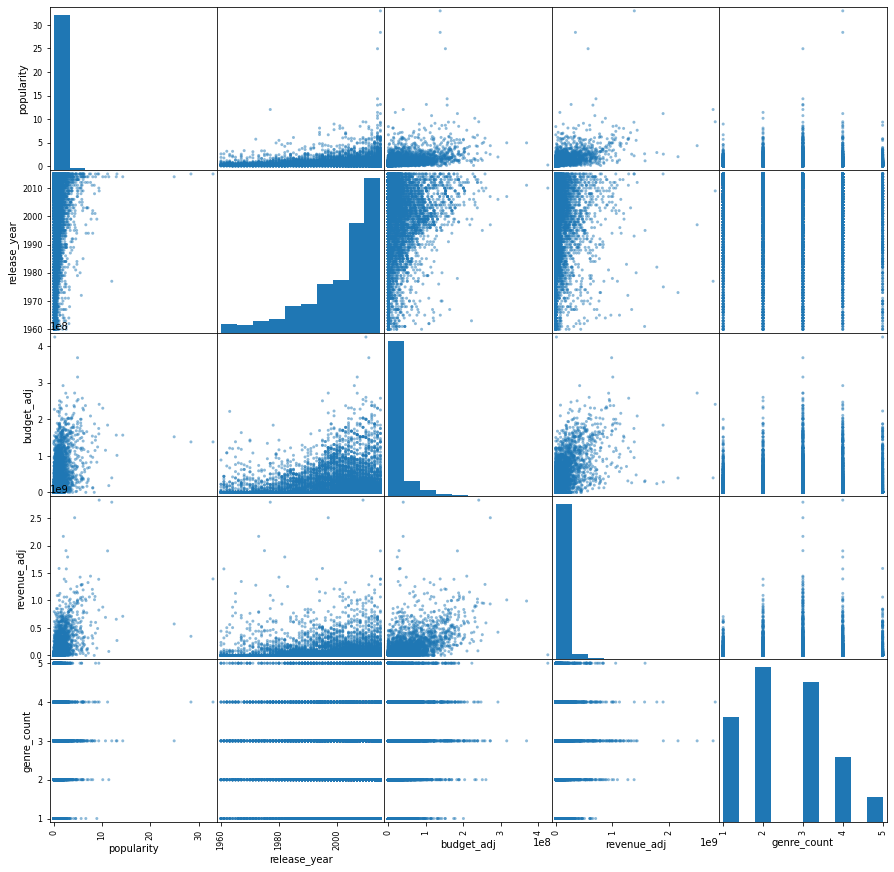

In [13]:
pd.plotting.scatter_matrix(df_o,figsize=(15,15));

### Research Question 1: Which genres have the most revenue from year to year?

Define a new dataframe in which zero-values in budget_adj and revenue_adj are excluded, for the revenue and budget related analysis. Excluding the zeros in these columns will ensure that the mean of these data are not negatively affected by the zeros.

In [14]:
df_fin = df_o[df_o['revenue_adj']!=0] # Exclue adjusted budget with 0 value
print ('The new shape of the TMDb Movies Data after excluding zero in the adjusted budget and adjusted revenue columns is ' ,df_fin.shape)
df_fin.head()

The new shape of the TMDb Movies Data after excluding zero in the adjusted budget and adjusted revenue columns is  (4849, 8)


,popularity,original_title,release_year,budget_adj,revenue_adj,primary_genre,genre_count,popularity_level
0,32.985763,Jurassic World,2015,1.379999e+08,1.392446e+09,Action,4,Very Popular
1,28.419936,Mad Max: Fury Road,2015,1.379999e+08,3.481613e+08,Action,4,Very Popular
2,13.112507,Insurgent,2015,1.012000e+08,2.716190e+08,Adventure,3,Very Popular
3,11.173104,Star Wars: The Force Awakens,2015,1.839999e+08,1.902723e+09,Action,4,Very Popular
4,9.335014,Furious 7,2015,1.747999e+08,1.385749e+09,Action,3,Very Popular


The below code puts movies into four revenue categories based on percentile break point function

In [15]:
point_names=['Low Revenue', 'Moderate Revenue', 'Middle Revenue', 'High Revenue']
df_fin=category_points(df_fin,'revenue_adj',point_names)
df_fin.head(3)

,popularity,original_title,release_year,budget_adj,revenue_adj,primary_genre,genre_count,popularity_level,revenue_adj_level
0,32.985763,Jurassic World,2015,1.379999e+08,1.392446e+09,Action,4,Very Popular,High Revenue
1,28.419936,Mad Max: Fury Road,2015,1.379999e+08,3.481613e+08,Action,4,Very Popular,High Revenue
2,13.112507,Insurgent,2015,1.012000e+08,2.716190e+08,Adventure,3,Very Popular,High Revenue


In [16]:
df_fin.describe()

,popularity,release_year,budget_adj,revenue_adj,genre_count
count,4849.000000,4849.000000,4.849000e+03,4.849000e+03,4849.000000
mean,1.045202,2000.919777,3.516208e+07,1.151009e+08,2.611673
std,1.356752,11.569650,4.376117e+07,1.988557e+08,1.122617
min,0.001117,1960.000000,0.000000e+00,2.370705e+00,1.000000
25%,0.387740,1994.000000,2.329409e+06,1.046585e+07,2.000000
50%,0.680581,2004.000000,2.032801e+07,4.395666e+07,3.000000
75%,1.210502,2010.000000,4.973516e+07,1.316482e+08,3.000000
max,32.985763,2015.000000,4.250000e+08,2.827124e+09,5.000000


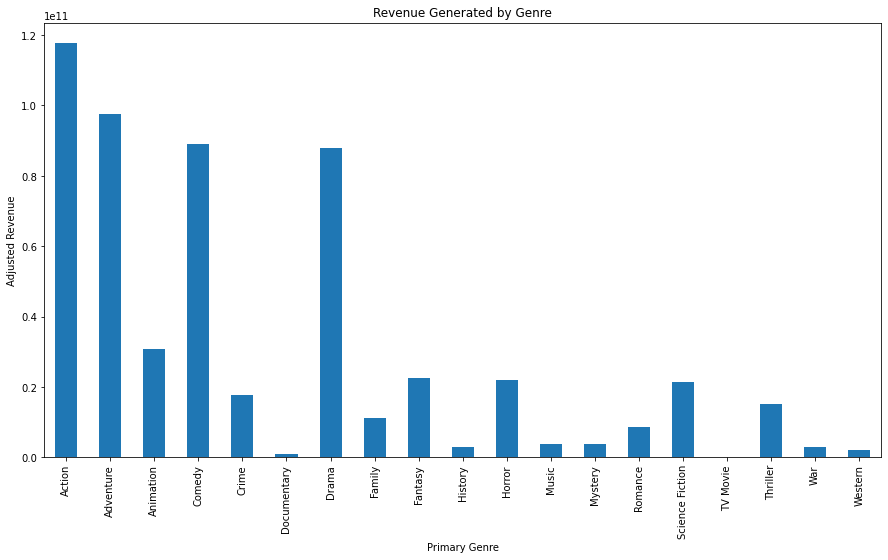

In [17]:
df_fin.groupby(['primary_genre']).revenue_adj.sum().plot (kind='bar', figsize= (15, 8), xlabel='Primary Genre', ylabel='Adjusted Revenue', title='Revenue Generated by Genre');

>Action movies have the he highest revenue, followed by Adventure, Comedy and Drama

>TV Movies and Domentaries raised the least revenues

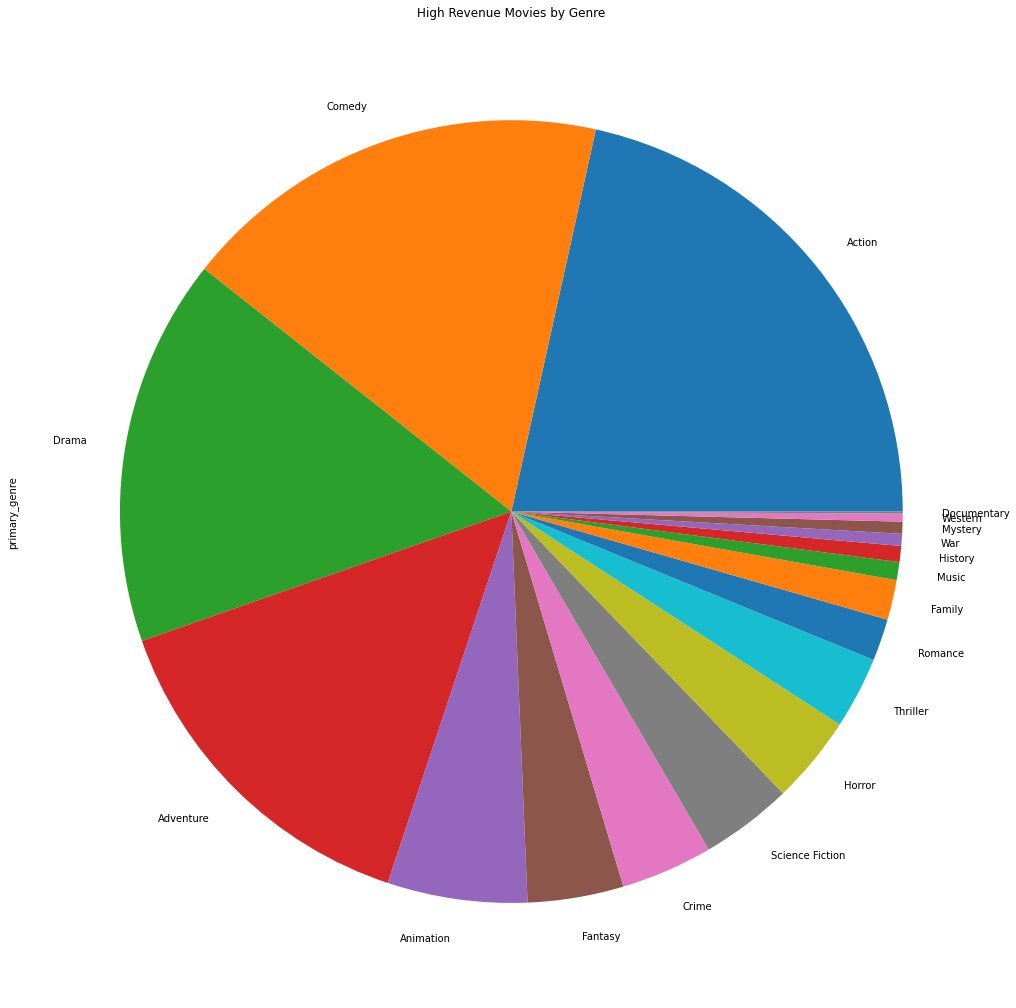

In [18]:
df_fin[df_fin['revenue_adj_level'] == 'High Revenue']['primary_genre'].value_counts().plot(kind='pie', figsize= (18, 18), title='High Revenue Movies by Genre');

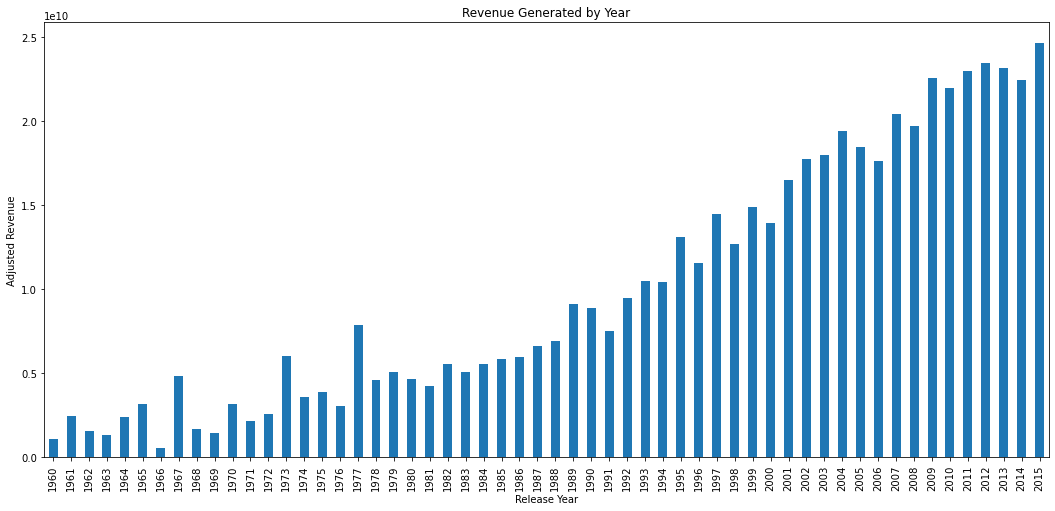

In [19]:
df_fin.groupby(['release_year']).revenue_adj.sum().plot (kind='bar', figsize= (18, 8), xlabel='Release Year', ylabel='Adjusted Revenue', title='Revenue Generated by Year');

>2015 movies have the highest revenues while the least revenues are for 1966

### Research Question 2: Which genres are most popular from year to year?

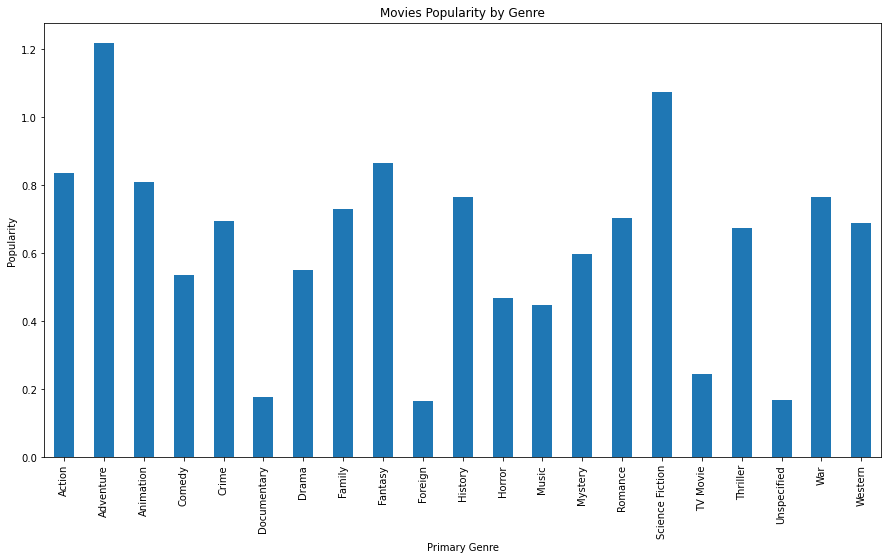

In [20]:
df_o.groupby(['primary_genre']).popularity.mean().plot (kind='bar', figsize= (15, 8), xlabel='Primary Genre', ylabel='Popularity', title='Movies Popularity by Genre');

>Advanture movies have the most popularity of the recorded movies, followed by Science Fiction movies. Foreign movies and Documentaries have the least popularity.

### Research Question 3: What's the relationship between popularity and revenue?

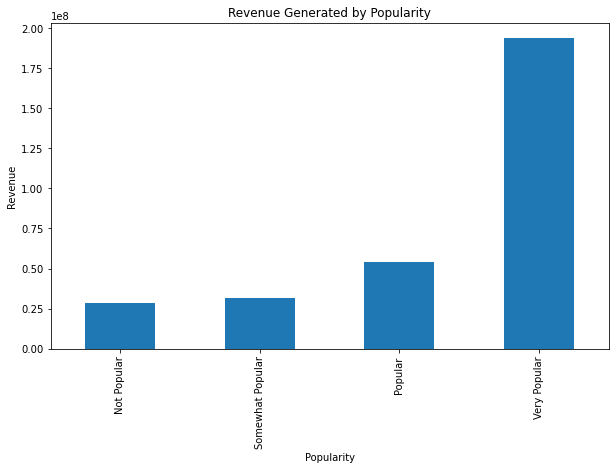

In [21]:
df_fin.groupby(['popularity_level']).revenue_adj.mean().plot (kind='bar', figsize= (10, 6), xlabel='Popularity', ylabel='Revenue', title='Revenue Generated by Popularity');

>This data shows that popuarity impacts revenue. Very Popular movies have the highest revenue while movies that are not popular have the least revenue.

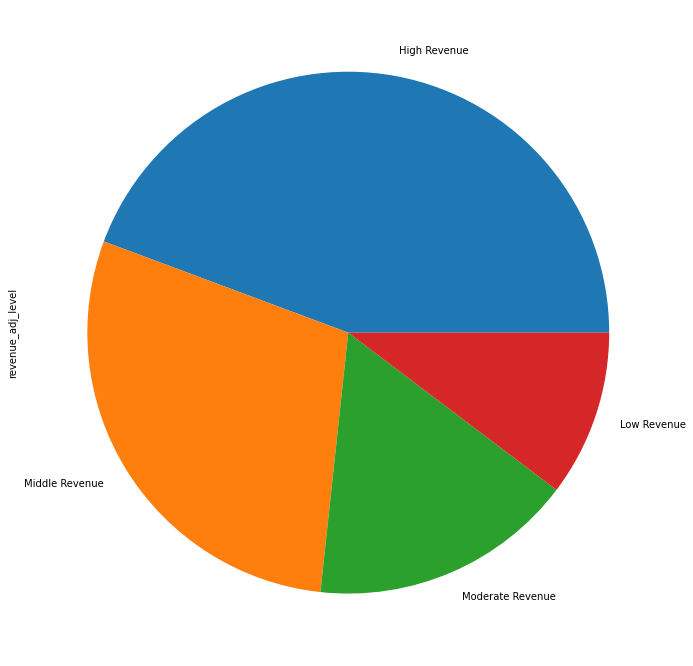

In [22]:
df_fin[df_fin['popularity_level'] == 'Very Popular']['revenue_adj_level'].value_counts().plot(kind='pie', figsize= (12, 12));

### Research Question 4: What's the relationship between budget and revenue?

In [23]:
df_fin = df_o[df_o['budget_adj']!=0] # Exclue adjusted budget with 0 value
df_fin = df_fin[df_fin['revenue_adj']!=0] # Exclue adjusted revenues with 0 value
print ('The new shape of the TMDb Movies Data after excluding zero in the adjusted budget and adjusted revenue columns is ' ,df_fin.shape)

#The below code puts movies into four budjet categories based on percentile break point function
point_names=['Low Budget', 'Moderate Budget', 'Middle Budget', 'High Budget']
df_fin=category_points(df_fin,'budget_adj',point_names)
df_fin.head()

The new shape of the TMDb Movies Data after excluding zero in the adjusted budget and adjusted revenue columns is  (3854, 8)


,popularity,original_title,release_year,budget_adj,revenue_adj,primary_genre,genre_count,popularity_level,budget_adj_level
0,32.985763,Jurassic World,2015,1.379999e+08,1.392446e+09,Action,4,Very Popular,High Budget
1,28.419936,Mad Max: Fury Road,2015,1.379999e+08,3.481613e+08,Action,4,Very Popular,High Budget
2,13.112507,Insurgent,2015,1.012000e+08,2.716190e+08,Adventure,3,Very Popular,High Budget
3,11.173104,Star Wars: The Force Awakens,2015,1.839999e+08,1.902723e+09,Action,4,Very Popular,High Budget
4,9.335014,Furious 7,2015,1.747999e+08,1.385749e+09,Action,3,Very Popular,High Budget


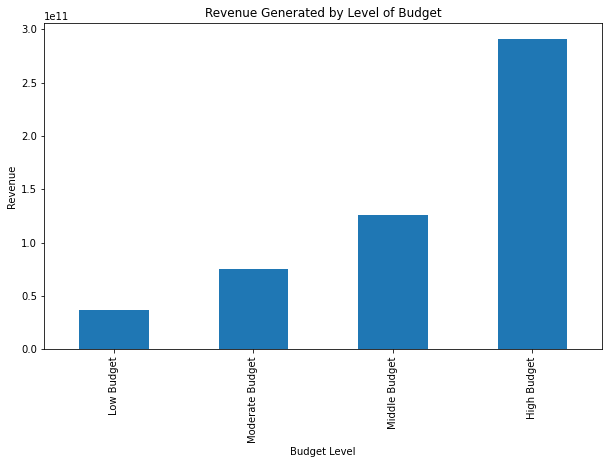

In [24]:
df_fin.groupby(['budget_adj_level']).revenue_adj.sum().plot (kind='bar', figsize= (10, 6), xlabel='Budget Level', ylabel='Revenue', title='Revenue Generated by Level of Budget');

>The data points out that movies revenue is increased according the the size of its budget.

<a id='conclusions'></a>
## Conclusions

we investigated the TMDb Movies dataset along four questions. we can summarize the key findings from the data as follow.

#### Which genres have the most revenue from year to year?
- Action movies have the he highest revenue while TV Movies have the least revenues
- Action, Comedy and Drama have the biggest shares among movies with high revenues
- Movies from the 90s to seem to have high revenues than older movies.

#### Which genres are most popular from year to year?
- Advanture and Science Fictions are most top in popularity

#### What's the relationship between popularity and revenue?
- The majority of high revenue movies are very popular

#### What's the relationship between budget and revenue?
- The majority of high revenue movies have high budget



## Limitations

- Several revenue and budget data were missing from the data
- Drama, Comedy, and Action genres are very frequent in the dataset and may affect the result of their popularity and revenues


## References

- http://stackoverflow.com
- https://www.geeksforgeeks.org
- https://pandas.pydata.org/docs/index.html
- https://note.nkmk.me/en/python-pandas-nan-extract/
- https://www.easytweaks.com/select-rows-nan-null-pandas/